Redes neurais e multilayer perceptron 

As redes neurais artificiais são uma estrutura matemática baseada na conexão de vários neurônios artificiais que trabalham juntos para responder a um estímulo. O neurônio artificial é um modelo matemático baseado na regressão logística. 

#Criando o dataset XOR

In [77]:
#importando bibliotecas necessárias

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


In [78]:
#seed
np.random.seed(1000)

#parâmetros das subamostras geradas

nb_samples = 1000
nsb = int(nb_samples/4)

In [79]:
#inicializando as matrizes 

X = np.zeros((nb_samples, 2))
Y = np.zeros((nb_samples, ))

In [80]:
#amostras aleatórias com distribuição normal multivariada

X[0:nsb, :] = np.random.multivariate_normal([1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[0:nsb] = 0.0

X[nsb:(2 * nsb), :] = np.random.multivariate_normal([1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[nsb:(2 * nsb)] = 1.0

X[(2 * nsb):(3 * nsb), :] = np.random.multivariate_normal([-1.0, 1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(2 * nsb):(3 * nsb)] = 0.0

X[(3 * nsb):, :] = np.random.multivariate_normal([-1.0, -1.0], np.diag([0.1, 0.1]), size=nsb)
Y[(3 * nsb):] = 1.0

In [81]:
#padronização dos dados
ss = StandardScaler()
X = ss.fit_transform(X)

#embaralhando aleatoriamente as amostras e seus respectivos rótulos
X, Y = shuffle(X, Y, random_state= 1000)

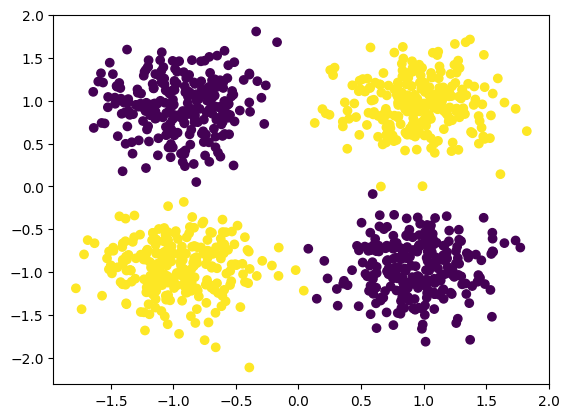

In [82]:
#Plotando o gráfico do dataset XOR
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

Verificação da acurácia utilizando um perceptron

In [83]:
#importando as bibliotecas necessárias
from multiprocessing import cpu_count

from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

In [84]:
#verificando a acurácia

pc = Perceptron(penalty='l2', alpha= 0.1, max_iter= 1000, n_jobs= cpu_count(), random_state=1000)
print(np.mean(cross_val_score(pc, X, Y, cv= 10)))

0.5039999999999999


Como as regiões são delimitadas pelo perceptron?

In [85]:
#Funções para plotar a superficie (regiões)
#criadas pela separação pelo modelo criado

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_model(clf):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Superfície de Decisão')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(title)
    plt.show()

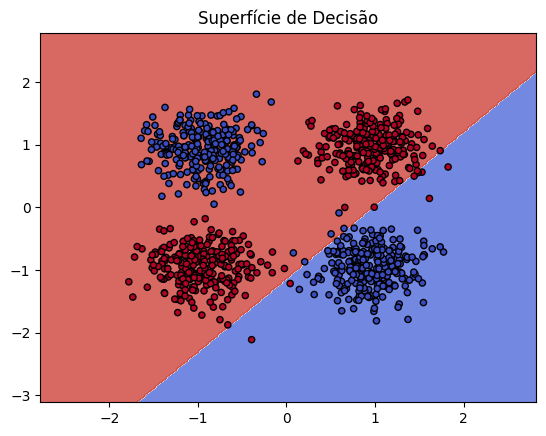

In [86]:
#plotando os resultados

pc.fit(X, Y)
plot_model(pc)

Utilizando Mutilayer Perceptron (MLP)

In [87]:
#importando bibliotecas 

from keras.models import Sequential
from keras.layers import Dense, Activation

In [88]:
# Inicialização de um modelo sequencial
model = Sequential()

# camada com 6 neuronios usando função de ativação tgh
model.add(Dense(6, input_dim=2))
model.add(Activation('tanh'))   

 # camada com 3 neuronios usando função de ativação softmax
model.add(Dense(2))  
model.add(Activation('softmax'))   

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
#separando o dataset em conjunto de treino e conjunto de teste

#importando bibliotecas
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [90]:
#dados de treino e dados de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 1000) #30% para teste

In [91]:
#treinamento da rede neural

#usando 150 épocas

model.fit(X_train, to_categorical(Y_train, num_classes= 2),
          epochs= 150,
          batch_size= 42,
          validation_data = (X_test, to_categorical(Y_test, num_classes= 2)))

Epoch 1/150
17/17 [==============================] - 1s 16ms/step - loss: 0.7034 - accuracy: 0.4914 - val_loss: 0.6883 - val_accuracy: 0.5433
Epoch 2/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.4971 - val_loss: 0.6855 - val_accuracy: 0.5400
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5071 - val_loss: 0.6835 - val_accuracy: 0.5467
Epoch 4/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.5471 - val_loss: 0.6811 - val_accuracy: 0.5933
Epoch 5/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6813 - accuracy: 0.5943 - val_loss: 0.6787 - val_accuracy: 0.6200
Epoch 6/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6776 - accuracy: 0.6443 - val_loss: 0.6767 - val_accuracy: 0.6400
Epoch 7/150
17/17 [==============================] - 0s 4ms/step - loss: 0.6736 - accuracy: 0.6914 - val_loss: 0.6743 - val_accuracy: 0.6833
Epoch 8/150


In [92]:
#verificação(predição) usando a base de teste

Y_eval_mlp = np.argmax(model.predict(X_test), axis=1)

10/10 [==============================] - 0s 2ms/step


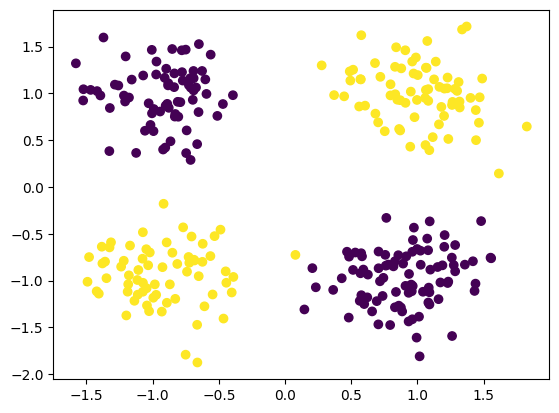

In [93]:
#plotando os resultados

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_eval_mlp)
plt.show()

Superficie usando o modelo atual com tanh

In [94]:
#Criação de uma grade de pontos de avaliação
Xm = np.linspace(-2.0, 2.0, 1000)
Ym = np.linspace(-2.0, 2.0, 1000)
Xmg, Ymg = np.meshgrid(Xm, Ym)

#Preparação dos dados de avaliação
X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T

#Avaliação da rede neural treinada
Y_eval_mlp = np.argmax(model.predict(X_eval), axis= 1)

31250/31250 [==============================] - 40s 1ms/step


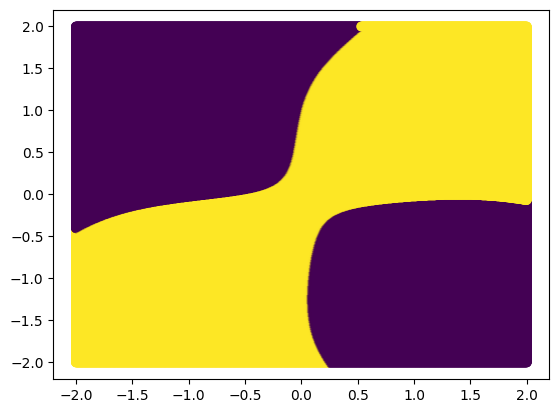

In [95]:
#plotando os resultados

plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
plt.show()

Modelo usando função de ativação Relu

In [96]:
# Inicialização de um modelo sequencial
model=  Sequential()

#adição de uma camada densa com 6 neurônios e dimensão de entrada 2
model.add(Dense(6, input_dim= 2))
model.add(Activation('relu'))

#adição de uma camada densa com 3 neurônios
model.add(Dense(2))
model.add(Activation('softmax'))

#compilação do modelo com otimizador Adam
model.compile(optimizer= 'adam',
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])


In [97]:
#separando o dataset em conjunto de treino e conjunto de teste

#importando bibliotecas
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [98]:
#dados de treino e dados de teste

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 1000) #30% para teste

In [99]:
#treinamento da rede neural utilizando 150 épocas

model.fit(X_train,
          to_categorical(Y_train, num_classes= 2),
          epochs= 150,
          batch_size= 42,
          validation_data= (X_test, to_categorical(Y_test, num_classes= 2)))

Epoch 1/150
17/17 [==============================] - 1s 20ms/step - loss: 0.6186 - accuracy: 0.5171 - val_loss: 0.6426 - val_accuracy: 0.4833
Epoch 2/150
17/17 [==============================] - 0s 6ms/step - loss: 0.5894 - accuracy: 0.5429 - val_loss: 0.6121 - val_accuracy: 0.5067
Epoch 3/150
17/17 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.5671 - val_loss: 0.5855 - val_accuracy: 0.5300
Epoch 4/150
17/17 [==============================] - 0s 6ms/step - loss: 0.5388 - accuracy: 0.6343 - val_loss: 0.5608 - val_accuracy: 0.6800
Epoch 5/150
17/17 [==============================] - 0s 6ms/step - loss: 0.5165 - accuracy: 0.7714 - val_loss: 0.5384 - val_accuracy: 0.7867
Epoch 6/150
17/17 [==============================] - 0s 5ms/step - loss: 0.4960 - accuracy: 0.8500 - val_loss: 0.5164 - val_accuracy: 0.8533
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - loss: 0.4766 - accuracy: 0.8829 - val_loss: 0.4960 - val_accuracy: 0.8733
Epoch 8/150


In [100]:
#verificação(predição) usando a base de teste
Y_eval_mlp= np.argmax(model.predict(X_test), axis= 1)

10/10 [==============================] - 0s 1ms/step


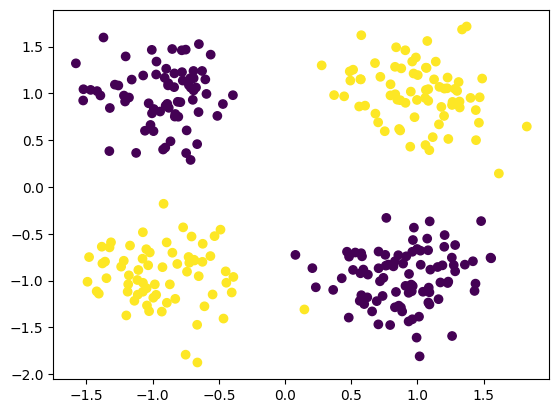

In [101]:
#plotando os resultados
plt.scatter(X_test[:, 0], X_test[:, 1], c= Y_eval_mlp)
plt.show()

In [102]:
#Criação de uma grade de pontos de avaliação
Xm = np.linspace(-2.0, 2.0, 1000)
Ym= np.linspace(-2.0, 2.0, 1000)
Xmg, Ymg= np.meshgrid(Xm, Ym)

#Preparação dos dados de avaliação
X_eval= np.vstack([Xmg.ravel(), Ymg.ravel()]).T

#Avaliação da rede neural treinada
Y_eval_mlp= np.argmax(model.predict(X_eval), axis= 1)

31250/31250 [==============================] - 40s 1ms/step


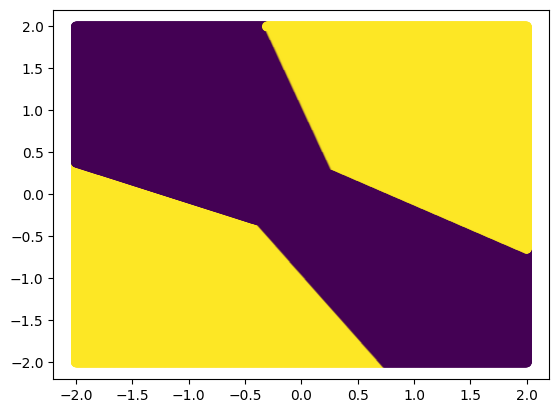

In [103]:
#plotando os resultados
plt.scatter(X_eval[:, 0], X_eval[:, 1], c= Y_eval_mlp)
plt.show()